<center><h1>Introduction to Artificial Neural Networks</h1>
<h3>Part 1:  Feedforward Networks for Regression<br /><br /> Elliott Forney, 2018</h3></center>


Thank you for finding your way to my tutorial series on Artificial Neural Networks (ANNs).  These guides are intended to be an introduction to Machine Learning (ML) applications of neural nets for people who have at least a moderate level of experience with Python, NumPy, data analysis, linear algebra and some calculus.  It is my hope that these tutorials will help to demystify the inner workings of neural networks and give the reader a strong starting point for designing and engineering neural nets to solve your own unique problems.

# Preliminaries

This tutorial is written in a Jupyter Notebook in Python3 so that you can actually run the experiments as you read!  I will also assume that you have some experience with array-based programming in NumPy and a basic knowledge of linear algebra and calculus.  If you don't have prior experience with Python and NumPy, it is probably a good idea to brush up on those tools first.  If you don't have a strong background in mathematics, you can probably continue and skim over some of the details of the derivations.

In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0,6.0)

# Regression

In machine learning and data science we frequently think in terms of data and models.  If we know the model that generated a given data set, then things are generally made quite easy.  It is generally the case, however, that we have some dataset and wish to derive a model that could have potentially generated it.  If we can find a good model, then we can make predictions about new data once we encounter it.

Another useful way to think about models is in terms of inputs and outputs.  For a given observation (the model inputs) the model generates some type of predictions (the model outputs).  Statisticians like to call model inputs "predictors" and model output "response variables" but this always seems less descriptive to me.

Regression is the act of finding an approximate model that maps input variables to outputs variables.

# Linear Least-Squares Regression

Linear Least-Squares Regression, often simply called Linear Regression, is straight forward and yet incredibly powerful tool for performing regression.  Linear Regression assumes that out model outputs can be described as a linear combination of our model inputs.  Suppose that a single observation to be fed into our model is a row vector
\begin{equation}
  \textbf{x} = [x_1, x_2, \ldots, x_F]
\end{equation}
where $F$ is the number of input dimensions to out model, also called the number of features.  The the predictions of a linear regression model can be described as
\begin{equation}
  y_j = \sum\limits_{i=0}^{F} x_i \cdot w_{i,j} + b
\end{equation}
where $b$ is a constant bias value, $w_{i,j}$ is the model weight associated with the $i$'th input dimensions and the $j$'th output dimensions and $y_j$ is the predicted value along the $j$'th output dimension.

Linear regression can also conveniently be written entirely in matrix notation.  Let $\mathbf{X} \in \mathbb{R}^{N \times F}$ be a matrix where the columns represent input dimensions and the rows represent observations and $\mathbf{W} \in \mathbb{R}^{F \times K}$ be a matrix of weights.  A linear regression model can then be written as
\begin{equation}
  \mathbf{Y} = \mathbf{\tilde{X}} \mathbf{W} 
\end{equation}
where where $K$ is the number of output dimensions and where the tilde above $\mathbf{X}$ denotes that a column of ones has been added in order to incorporates our bias terms and where $\mathbf{Y} \in \mathbb{R}^{N \times K}$ is our matrix of predictions.

A linear regression model can also be visualized as network graph, which illustrates how information flows through the model.



# Parameter estimation for Linear Regression

Now that we have established how information flows through an LR model, we need to determine the values of $\mathbf{W}$ that allow the model to actually fit a given dataset.

First need a target dataset $\mathbf{G} \in \mathbb{R}^{N \times K}$.

Then we wish to minimize squared error
\begin{align}
  E(\mathbf{W}) = (\mathbf{Y} - \mathbf{G})^2 = (\mathbf{\tilde{X}}\mathbf{W} - \mathbf{G})^2
\end{align}

From calculus, recall that the derivative of a continuous function must be zero at it's minimum.  The gradient of our error function is the matrix of it's derivatives,
\begin{align}
  \nabla E(\mathbf{W}) = & 2 \mathbf{\tilde{X}}^T (\mathbf{\tilde{X}}\mathbf{W} - \mathbf{G}) \\
  = & 2 \mathbf{\tilde{X}}^T \mathbf{\tilde{X}}\mathbf{W} - 2 \mathbf{\tilde{X}}^T \mathbf{G}. \\
\end{align}

We can then set the gradient to zero in order to find the local minimum
\begin{align}
  & \nabla E(\mathbf{W}) = 0 \\
  \Rightarrow & 2 \mathbf{\tilde{X}}^T \mathbf{\tilde{X}}\mathbf{W} = 2 \mathbf{\tilde{X}}^T \mathbf{G} \\
  \Rightarrow & \mathbf{W} = (\mathbf{\tilde{X}}^T \mathbf{\tilde{X}})^{-1} \mathbf{\tilde{X}}^T \mathbf{G} \\
\end{align}
As it turns out, linear regression is convex, meaning that there is only one minimum on the error surface.  We can verify this by finding the second-order gradient, left as an exercise for the reader

# Linear regression example

Let's implement linear regression in python...

In [2]:
def bias(v):
    """Add a column of ones for the bias term.
    """
    ns = v.shape[0]
    return np.hstack((v, np.ones(ns).reshape((ns,-1))))

# example
a = np.arange(5)[:,None]
bias(a)

array([[ 0.,  1.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 4.,  1.]])

In [3]:
class LinearRegression(object):
    """Linear least squares regression
    """
    def __init__(self, x, g, **kwargs):
        self.train(x, g, **kwargs)
        
    def train(self, x, g):
        # analytical solution, fails for underdetermined problems
        x1 = bias(x)
        self.w = np.linalg.solve(x1.T @ x1, x1.T @ g)

    def predict(self, x):
        return x @ self.w[:-1] + self.w[-1]

Let's consider a simple example of a linear function with normally distributed noise...

In [4]:
ns = 100
x = np.linspace(0, 1, ns)[:,None]
x -= x.mean(axis=0)
x /= x.std(axis=0)

g = 20.0*x + np.random.normal(size=(ns,1))
g -= g.mean(axis=0)
g /= g.std(axis=0)

In [5]:
lm = LinearRegression(x, g)
y = lm.predict(x)

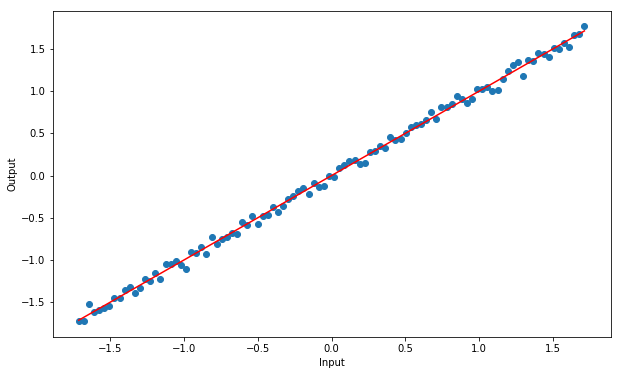

In [33]:
plt.scatter(x, g)
plt.plot(x, y, color="red");
plt.xlabel("Input")
plt.ylabel("Output");

# Regression for nonlinear problems

As it's name suggests, linear regression is purely linear in it's inputs, meaning that it is not directly able to model nonlinear curves.  Consider the nonlinear example below.

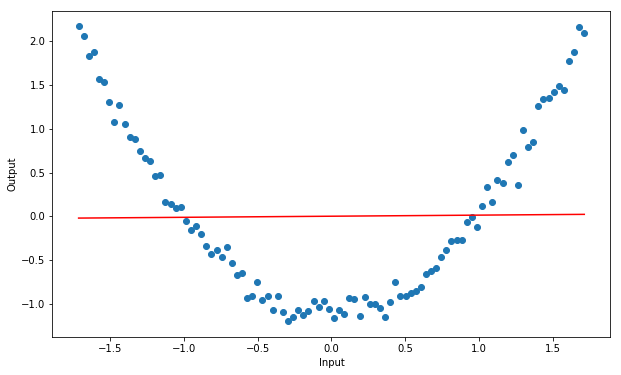

In [34]:
# a quadratic curve
g_curved = 10*x**2 + np.random.normal(size=(ns,1))
g_curved -= g_curved.mean(axis=0)
g_curved /= g_curved.std(axis=0)

lm_curved = LinearRegression(x, g_curved)
y_curved = lm_curved.predict(x)

plt.scatter(x, g_curved);
plt.plot(x, y_curved, color="red");
plt.xlabel("Input")
plt.ylabel("Output");

There are, however, many tricks that can be used to model nonlinear problems using the linear least squares approach.  For example, we can transform our inputs so that the model is nonlinear over the original inputs.  Below, we combine both $X$ and $X**2$ so that our linear regression model can fit our quadratic curve.  The approach can be further extended using the kernel trick, known as kernel ridge regression.

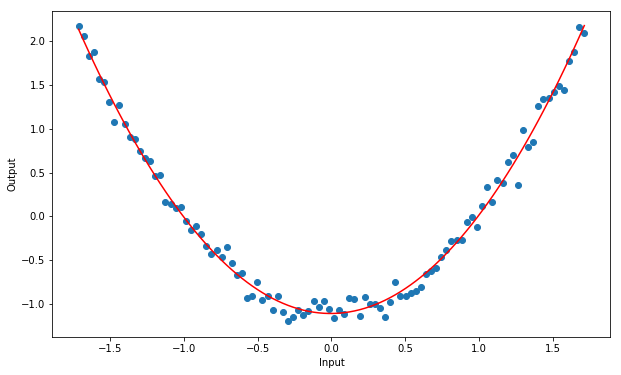

In [36]:
x_curved = np.hstack((x, x**2))
lm_curved2 = LinearRegression(x_curved, g_curved)
y_curved2 = lm_curved2.predict(x_curved)

plt.scatter(x, g_curved);
plt.plot(x, y_curved2, color="red");
plt.xlabel("Input")
plt.ylabel("Output");

# Neural networks are generic function approximators

One of the primary challenges with transforming the inputs to a linear model is that it requires some level of a priori knowledge about the type of transformation that is necessary.  In the above example, we knew that a quadratic transformation was appropriate through visualization.  In sophisticated, high-dimensional problems we often have no way to know what type of input transformation will work.

In order to solve this problem in a generic way, we can add a new layer to our model that contains flexible nonlinearities that can automatically learn to fit inputs.  This approach is known as a Neural Network (NN) and is also sometimes called a Multilayer Perceptron (MLP).

Universal approximator...

Again, assume that our input matrix $\mathbf{X} \in \mathbb{R}^{N \times F}$.  We now have two weight matrices: a hidden weight matrix for our nonlinearities and a visible weight matrix for our final linear regression. $\mathbf{W}_h \in \mathbb{R}^{F+1 \times M}$ and $\mathbf{W}_v \in \mathbb{R}^{M+1 \times K}$

Equations for the forward pass (to evaluate the network):
\begin{align}
  \mathbf{Z} = & \phi( \mathbf{W}_h \mathbf{\tilde{X}} ) \\
  \mathbf{Y} = & \mathbf{W}_v \mathbf{\tilde{Z}}
\end{align}

Our error function is, again, squared error:
\begin{align}
  E = & (\mathbf{Y} - \mathbf{G})^2
\end{align}

We can find the gradient of the visible layer
\begin{align}
  \nabla_{W_v} E = & \nabla_{Y} E \cdot \nabla_{W_v} Y \\
   = & \mathbf{Z}^T 2(\mathbf{Y} - \mathbf{G}) \\
   = & \phi(\mathbf{W}_h \mathbf{\tilde{X}})^T 2(\mathbf{Y} - \mathbf{G})
\end{align}

and the gradient of our hidden layer
\begin{align}
  \nabla_{W_h} E = & \nabla_{Y} E \cdot \nabla_{H_v} Y \\
  % = & \mathbf{\tilde{X}}^T 2(\mathbf{Y} - \mathbf{G})^T \phi^\prime(\mathbf{W}_h \mathbf{\tilde{X}})
\end{align}

We cannot, however, set the gradient to zero like we did for linear regression.

This is because optimizing a neural network is not a convex problem.  There may be many optimal solutions, called local minima.

To see this, notice that there are symmetries for each hidden unit.

In [9]:
def weight_init(size):
    """Initialize NN weight matrices, Lecun fast backprop
    """
    return np.random.uniform(-np.sqrt(3.0 / size[0]),
                np.sqrt(3.0 / size[0]), size=size)

In [40]:
class ForwardNet(object):
    def __init__(self, x, g, nh,
                 phi=np.tanh,
                 phi_prime=lambda v: 1.0 - np.tanh(v)**2,
                 **kwargs):
        """Feedforward neural network with two fully-connected layers.
        """
        ni = x.shape[1] # num inputs
        no = g.shape[1] # num outputs
        self.phi = phi  # transfer func
        self.phi_prime = phi_prime # grad of trans func

        # initialize hidden weights
        self.hw = weight_init((ni+1, nh))
        
        # initialize visible weights
        self.vw = weight_init((nh+1, no))
        
        self.train(x, g, **kwargs)

    def gradient(self, x, g):
        """Compute MSE and error gradients
        """
        # forward pass
        x1 = bias(x)
        h = x1 @ self.hw
        z1 = bias(self.phi(h))
        z_prime = self.phi_prime(h)
        y = z1 @ self.vw
        
        # error components
        e = y - g
        delta = 2.0 * (y - g) / e.size

        # visible layer gradient
        vg = z1.T @ delta

        # error backprop through visible layer
        delta = delta @ self.vw[:-1].T * z_prime

        # hidden layer gradient
        hg = x1.T @ delta

        # error, hidden grad, visible grad
        return np.mean(e**2), hg, vg
    
    def train(self, x, g,
              learning_rate=0.1, maxiter=3000, tol=1.0e-2):
        """Steepest descent
        """
        i = 0
        prev_error = np.inf
        while True:
            error, hg, vg = self.gradient(x, g)
            
            if (i % 500) == 0:
                print(i, error)

            if np.abs(prev_error - error) < tol:
                print("reached tol")
                break
            
            if i > maxiter:
                print("reached iter")
                break

            self.hw -= learning_rate * hg
            self.vw -= learning_rate * vg
            
            error_prev = error
            i += 1

    def predict(self, x):
        """Compute predictions for inputs x
        """
        h = x @ self.hw[:-1] + self.hw[-1]
        z = self.phi(h)
        y = z @ self.vw[:-1] + self.vw[-1]
        return y
    
    def eval_hidden(self, x):
        """Generate outputs of hidden units.
        """
        h = x @ self.hw[:-1] + self.hw[-1]
        z = self.phi(h)
        return z

Our quadric example again...

0 1.92777773268
500 0.013655233345
1000 0.0121829115074
1500 0.0118710868181
2000 0.0116476520714
2500 0.0114706321907
3000 0.0113267794979
reached iter


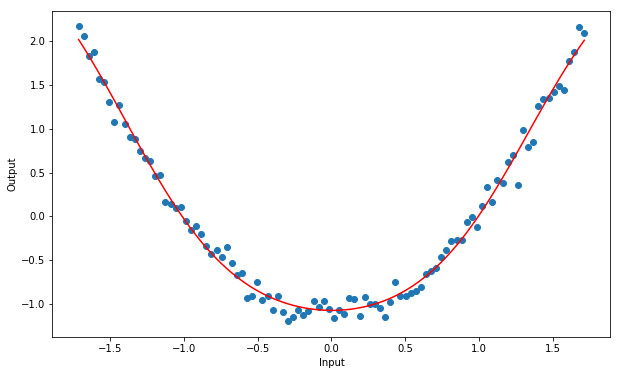

In [41]:
nn_curved = ForwardNet(x, g_curved, nh=5, learning_rate=0.1, maxiter=3000)
y_curved_nn = nn_curved.predict(x)

plt.scatter(x, g_curved);
plt.plot(x, y_curved_nn, color="red");
plt.xlabel("Input")
plt.ylabel("Output");

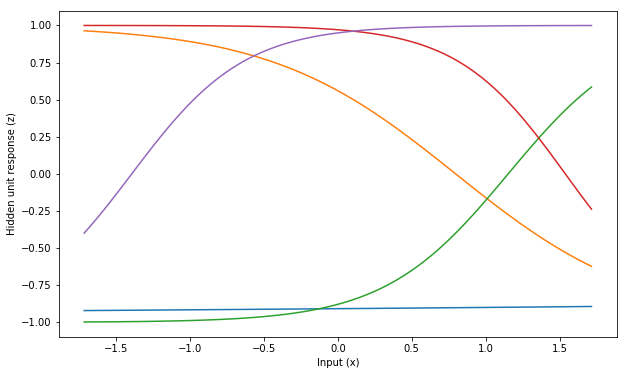

In [32]:
z_curved_nn = nn_curved.eval_hidden(x)
plt.plot(x, z_curved_nn);
plt.xlabel("Input (x)")
plt.ylabel("Hidden unit response (z)");

Something a little more sophisticated

0 0.687406947926
500 0.104621128692
1000 0.0958988508658
1500 0.0826648973662
2000 0.0591213199008
2500 0.0367217011533
3000 0.0239724409081
3500 0.0175610509293
4000 0.0136826750053
reached iter


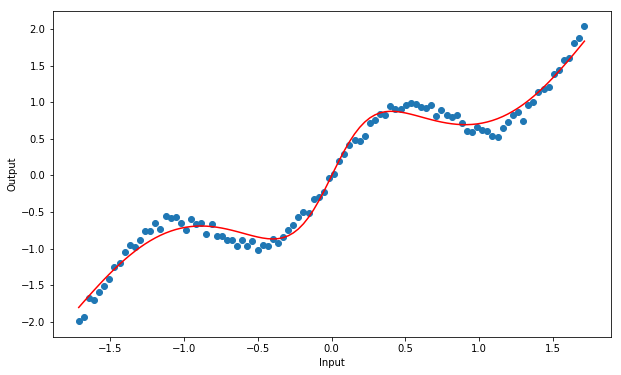

In [42]:
g_ripple = g + 0.5 * np.sin(4*x)
g_ripple -= g.mean(axis=0)
g_ripple /= g.std(axis=0)

nn_ripple = ForwardNet(x, g_ripple, nh=10, learning_rate=0.1, maxiter=4000)
y_ripple = nn_ripple.predict(x)

plt.scatter(x, g_ripple);
plt.plot(x, y_ripple, color="red");
plt.xlabel("Input")
plt.ylabel("Output");

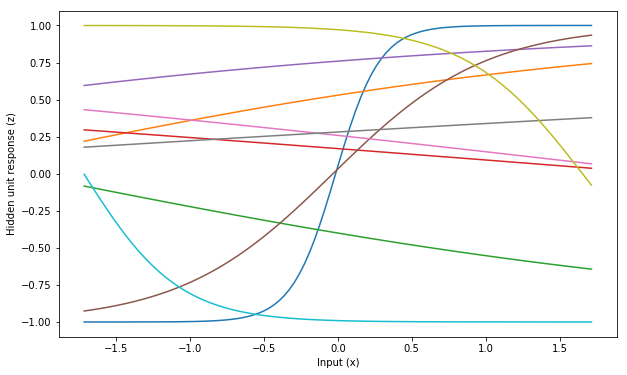

In [30]:
z_ripple = nn_ripple.eval_hidden(x)
plt.plot(x, z_ripple);
plt.xlabel("Input (x)")
plt.ylabel("Hidden unit response (z)");

# Alternative optimization techniques

Steepest descent has a lot of problems...

Batch / offline:  full gradient

Stochastic / online:  one sample at a time

Mini-batch stochastic:  small mini-batch of samples for each update

## Stochastic Gradient Descent

Update weights for each observation, or a small mini-batch of them

Can avoid local minima

works well if cannot fit data into memory or are continually updating model

tends to require fewer passes over all the data

but is noisy (stochastic)

and performs lots of small and expensive gradient evaluations

In [43]:
class ForwardNetSGD(ForwardNet):
    """Feedforward network using Stochastic Gradient Descent
    """
    def train(self, x, g, batch_size=10,
              learning_rate=0.1, maxiter=1500, tol=1.0e-2):
        i = 0
        prev_error = np.mean((self.predict(x) - g)**2)

        while True:
            if i > maxiter:
                print("reached iter")
                break
            
            for start in range(0, x.shape[0]-1, batch_size):
                end = min(start+batch_size, x.shape[0]-1)                
                _, hg, vg = self.gradient(x[start:end], g[start:end])
                
                self.hw -= learning_rate * hg
                self.vw -= learning_rate * vg

            error = np.mean((self.predict(x) - g)**2)
            
            if (i % 500) == 0:
                print(i, error)

            if np.abs(prev_error - error) < tol:
                print("reached tol")
                break
            
            error_prev = error
            i += 1

0 0.922805068253
500 0.0838025590848
1000 0.0707968631069
1500 0.0696216207502
2000 0.0651827006881
reached iter


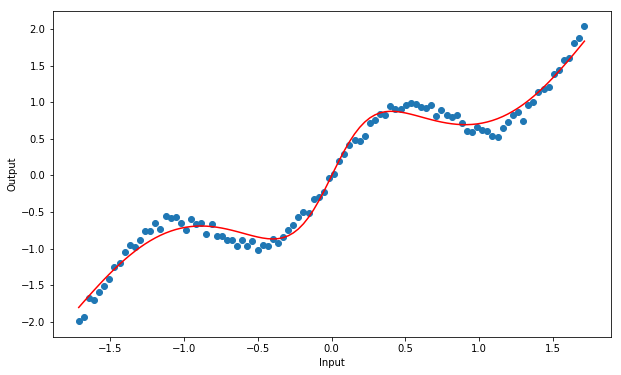

In [44]:
nn_ripple_sgd = ForwardNetSGD(x, g_ripple, nh=10, learning_rate=0.1, maxiter=2000)
y_ripple_sgd = nn_ripple.predict(x)

plt.scatter(x, g_ripple);
plt.plot(x, y_ripple_sgd, color="red");
plt.xlabel("Input")
plt.ylabel("Output");

# Conjugate gradients

Uses full gradient, assumes error surface can be approximated by quadratic function in a local neighborhood

In [47]:
import scipy.optimize as spopt

class ForwardNetCG(ForwardNet):
    def train(self, x, g,
              maxiter=500, tol=1.0e-6):

        def error_func(v):
            self.hw.flat[...] = v[:self.hw.size]
            self.vw.flat[...] = v[self.hw.size:]
            return np.mean((self.predict(x) - g)**2)
        
        def grad_func(v):
            self.hw.flat[...] = v[:self.hw.size]
            self.vw.flat[...] = v[self.hw.size:]
            _, hg, vg = self.gradient(x, g)
            return np.concatenate((hg.flatten(), vg.flatten()))
        
        def callback(v):
            if (callback.i % 100) == 0:
                self.hw.flat[...] = v[:self.hw.size]
                self.vw.flat[...] = v[self.hw.size:]
                print(callback.i, np.mean((self.predict(x) - g)**2))
            callback.i += 1
        callback.i = 0

        method = "BFGS"
        options = {"maxiter": maxiter}
        w = np.concatenate((self.hw.flat, self.vw.flat))
        optres = spopt.minimize(fun=error_func, method=method,
                x0=w, tol=tol, jac=grad_func, options=options)#, callback=callback)

        print(optres)
        print("error: ", np.mean((self.predict(x) - g)**2))

      fun: 0.002329461893530172
 hess_inv: array([[  220.553 ,    24.2936,  -411.8852,   163.7849, ...,    99.6739,   550.9933,
         -279.5076,    92.1457],
       [   24.2936,   486.114 ,    72.2938,  -240.4945, ...,    -1.9711,  -104.7421,
           79.6756,  -115.4516],
       [ -411.8852,    72.2938,   911.5784,  -333.6654, ...,  -260.3668, -1170.9169,
          602.0114,  -257.1242],
       [  163.7849,  -240.4945,  -333.6654,   321.6503, ...,    21.2255,   460.366 ,
         -246.0461,   130.4568],
       ..., 
       [   99.6739,    -1.9711,  -260.3668,    21.2255, ...,   144.4746,   319.7386,
         -165.5023,    56.9331],
       [  550.9933,  -104.7421, -1170.9169,   460.366 , ...,   319.7386,  1539.3358,
         -778.6657,   324.6917],
       [ -279.5076,    79.6756,   602.0114,  -246.0461, ...,  -165.5023,  -778.6657,
          409.1783,  -168.1918],
       [   92.1457,  -115.4516,  -257.1242,   130.4568, ...,    56.9331,   324.6917,
         -168.1918,   109.4946]])

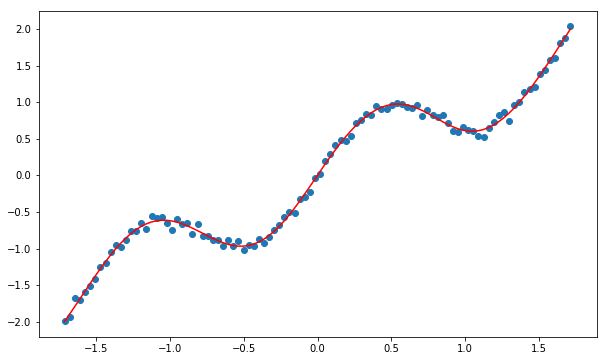

In [50]:
nn_ripple_cg = ForwardNetCG(x, g_ripple, nh=10, maxiter=150)
y_ripple_cg = nn_ripple_cg.predict(x)

plt.scatter(x, g_ripple);
plt.plot(x, y_ripple_cg, color="red");